# Практическое занятие в рамках Осенней ИТ-школы ОИЯИ-2024

##  Математическое моделирование джозефсоновского перехода сверхпроводник/ферромагнетик/сверхпроводник на поверхности трехмерного топологического изолятора

## 1. Введение: Исследование поведения подынтегральной функции при различных значениях параметров, численное интегрирование и аппроксимация интегралов при различных значениях параметров

__Особенности вычисления интеграла:__

$$j_s = \int\limits_{-\pi/2}^{\pi/2} \cos\varphi \exp{\left(-\frac{d}{\cos(\varphi)}\right)} \cos (r m_x \tan\varphi) d\varphi.$$

Подынтегральная функция на концах интрервала интегрирования не определена, однако

$$\lim_{\varphi \to \pm\frac{\pi}{2}} f( m_x, r, d, \varphi ) = 0.$$

_Параметры модели:_
* $d$ - безразмерная длина контакта, $d \in [0.1,0.8]$;
* $r$ - безразмерный параметр, определяющий величину спин-орбитального взаимодействия, $r \in [0.1,2]$;
* $G$ - отношение энергии Джозефсона к энергии магнитной анизотропии, $G \in [0.1,10]$;
* $\alpha$ - диссипация Гилберта $\alpha \in [0.01,0.2]$;
* $wF = 1$.

__Функция, подлежащая определению, значения которой при вычиcлении интеграла играет роль параметра__: $m_x$ - компонета намагниченности.

__Подключение необходимых библиотек__

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# use seaborn plotting defaults
sns.set()
sns.set(style="whitegrid")

__Определим подынтегральную функцию__

In [2]:
def funct_js(phi, mx, r, d):
    ''' Defines the integrand in the definition of current js,
        mx, r, d - parameters '''
    return (np.cos(phi) * np.exp(-d / np.cos(phi)) * np.cos(r*mx*np.tan(phi)))    

__Параметры__

In [3]:
d = 0.8
r = 1.1
mx = 0.8

In [4]:
phi = np.linspace(-np.pi/2, np.pi/2, 300, endpoint=True)

In [5]:
y = funct_js(phi, mx, r, d)

In [6]:
# funct_js(phi, mx, r, d)

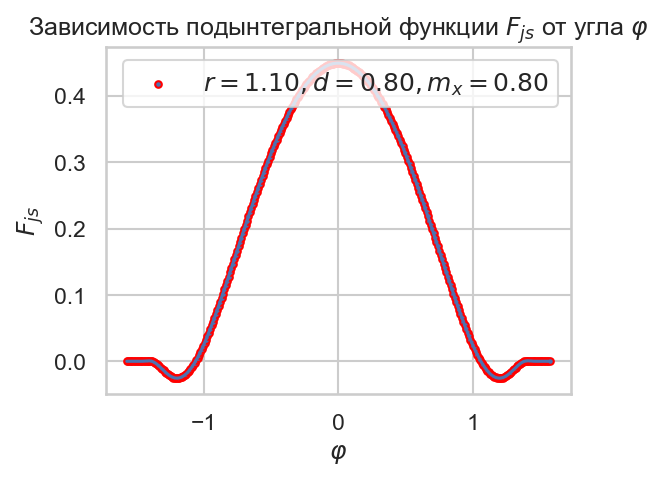

In [7]:
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(phi, y, edgecolor="red", s=10,
            label=r'$r=%6.2f, d=%6.2f, m_x=%6.2f$' % (r, d, mx))
plt.plot(phi, y)
plt.xlabel(r"$\varphi$")
plt.ylabel("$F_{js}$")

plt.title(r"Зависимость подынтегральной функции $F_{js}$ от угла $\varphi$")
plt.legend(loc='upper right', fontsize=12)

plt.show()

__Численное интегрирование с использованием библиотеки SciPy__

Воспользуемся функцией [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html):
```python
quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50, complex_func=False)[source]
```

Compute a definite integral.
Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.

In [8]:
from scipy.integrate import quad

In [9]:
%%time
js = quad(funct_js, -np.pi/2, np.pi/2, args=(mx, r, d))

CPU times: user 3.52 ms, sys: 103 μs, total: 3.62 ms
Wall time: 4.1 ms


In [10]:
js

(0.5616726952897881, 1.3014932435115616e-08)

In [11]:
Npoint = 1000
arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)

In [12]:
arr_js = np.zeros(Npoint, dtype=np.float64)

In [13]:
arr_err = np.zeros(Npoint, dtype=np.float64)

In [14]:
%%time
for ind in range(Npoint):
    mx = arr_mx[ind]
    arr_js[ind], arr_err[ind] = quad(funct_js, -np.pi/2, np.pi/2, args=(mx, r, d))

CPU times: user 798 ms, sys: 32.6 ms, total: 831 ms
Wall time: 856 ms


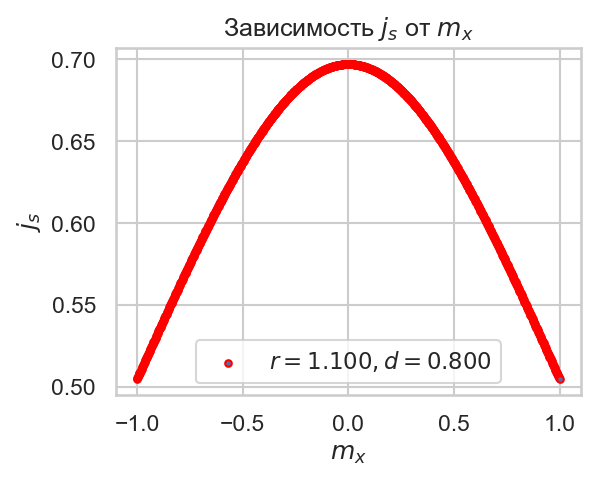

In [15]:
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(arr_mx, arr_js, edgecolor="red", s=10,
            label=r'$r=%6.3f, d=%6.3f$' % (r, d))
plt.xlabel("$m_x$")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$ от $m_x$")
plt.legend()

plt.show()

### Интерактивное управление в Jupyter Notebooks:  библиотека *IPywidgets*
Для решения задач инерактивного управления параметрами воспользуемся библиотекой *IPywidgets* ([См. ссылку](https://ipywidgets.readthedocs.io/en/stable/index.html)). С помощью этой библиотеки блокнот Jupyter превращается в диалоговую панель, удобную для визуализации и работы с данными.

Для работа с *IPywidgets*  создаем ячейку с:
```python
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Label
```
Список доступных виджетов (*Widget List*) можно найти на [сайте библиотеки](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Widget-List).
 
Однако, в библиотеке есть удобная функция (*ipywidgets.interact*), котороя  автоматически создает элементы управления пользовательского интерфейса (UI) для интерактивного изучения кода и данных. Это самый простой способ начать использовать виджеты IPython.

Мы воспользуемся конструкцией (декоратор):

@interact

которая автоматически создаёт  и текстовое поле и слайдер для выбора колонки и числа. Декоратор смотрит на введённые параметры и создаёт панель диалогового управления, основываясь на типах данных.

[Пример](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Basic-interact)

In [16]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Label

In [17]:
%matplotlib widget

In [18]:
@interact(mx=1.0, r=0.1, d=0.8, phi=np.pi/8)
def funct_js(phi, mx, r, d):
    ''' Defines the integrand in the definition of current js,
        mx, r, d - parameters '''
    return (np.cos(phi) * np.exp(-d / np.cos(phi)) * np.cos(r*mx*np.tan(phi)))

interactive(children=(FloatSlider(value=0.39269908169872414, description='phi', max=1.1780972450961724, min=-0…

In [19]:
@interact
def show_js_mx(mx=(-2.0, 2.0, 0.2), r=(0.1, 2.0, 0.1), d=(0.1, 0.8, 0.1)):
    phi = np.linspace(-np.pi/2, np.pi/2, 300, endpoint=True)
    fig = plt.figure(figsize=(4, 3))
    plt.scatter(phi, funct_js(phi, mx, r, d), edgecolor="red", s=10,
                label=r'$r=%6.3f, d=%6.3f$' % (r, d))
    plt.plot(phi, funct_js(phi, mx, r, d))
    plt.xlabel(r"$\varphi$", fontsize=14)
    plt.ylabel("$j_{s}$", fontsize=14)
    plt.title(r"Зависимость $f$ от угла $\varphi$", fontsize=16)
    plt.legend(loc='upper right', fontsize=13)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='mx', max=2.0, min=-2.0, step=0.2), FloatSlider(value…

__Для дальнейших исследований представляет интерес рассмотрение поведения функции тока $j_s$ и интегралов $I_x$ и $I_y$ при различных значениях параметров.__

In [20]:
@interact
def show_funct_js(r=(0.1, 4.0, 0.1), d=(0.1, 0.8, 0.1)):
    Npoint = 1000  # количество точек (число вызовов функции интегрирования)
    arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
    arr_js = np.zeros(Npoint, dtype=np.float64)
    arr_err = np.zeros(Npoint, dtype=np.float64)
    for ind in range(Npoint):
        mx = arr_mx[ind]
        # интегрируем для каждого
        arr_js[ind], arr_err[ind] = quad(funct_js, -np.pi/2, np.pi/2,
                                         args=(mx, r, d))

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(arr_mx, arr_js, edgecolor="red", s=10,
                label=r'$r=%6.3f, d=%6.3f$' % (r, d))
    plt.xlabel("$m_x$ ", fontsize=14)
    plt.ylabel("$j_{s}$", fontsize=14)

    plt.title("Зависимость $j_s$  от параметра  $m_x$ ", fontsize=16)
    plt.legend(fontsize=13)

    plt.show()

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, min=0.1), FloatSlider(value=0.4, descri…

#### Поведение интегралов $I_x$ и $I_y$ при различных значениях параметров


In [21]:
def funct_Ix(phi, mx, r, d):
    ''' Defines the integrand in the definition of current Ix,
        mx, r, d - parameters'''
    return (np.sin(phi) * np.exp(-d / np.cos(phi)) * np.sin(r*mx*np.tan(phi)))

In [22]:
def funct_Iy(phi, mx, r, d):
    ''' Defines the integrand in the definition of current Iy,
        mx, r, d - parameters'''
    return (np.cos(phi) * np.exp(-d / np.cos(phi)) * np.cos(r*mx*np.tan(phi)))

In [23]:
@interact
def show_funct_Ix(r=(0.1, 2.0, 0.1), d=(0.1, 0.8, 0.1)):
    Npoint = 1000  # количество точек (число вызовов функции интегрирования)
    arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
    arr_Ix = np.zeros(Npoint, dtype=np.float64)
    arr_err = np.zeros(Npoint, dtype=np.float64)
    for ind in range(Npoint):
        mx = arr_mx[ind]
        # интегрируем для каждого
        arr_Ix[ind], arr_err[ind] = quad(funct_Ix, -np.pi/2, np.pi/2,
                                         args=(mx, r, d))

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(arr_mx, arr_js, edgecolor="red", s=10,
                label=r'$r=%6.3f, d=%6.3f$' % (r, d))
    plt.xlabel("$m_x$ ", fontsize=14)
    plt.ylabel("$I_{x}$", fontsize=14)

    plt.title("Зависимость $I_{x}$  от параметра  $m_x$ ", fontsize=16)
    plt.legend(fontsize=13)

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='r', max=2.0, min=0.1), FloatSlider(value=0.4, descri…

In [24]:
@interact
def show_funct_Iy(r=(0.1, 2.0, 0.1), d=(0.1, 0.8, 0.1)):
    Npoint = 1000  # количество точек (число вызовов функции интегрирования)
    arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
    arr_js = np.zeros(Npoint, dtype=np.float64)
    arr_err = np.zeros(Npoint, dtype=np.float64)
    for ind in range(Npoint):
        mx = arr_mx[ind]
        # интегрируем для каждого
        arr_js[ind], arr_err[ind] = quad(funct_Iy, -np.pi/2, np.pi/2,
                                         args=(mx, r, d))

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(arr_mx, arr_js, edgecolor="red", s=10,
                label=r'$r=%6.3f, d=%6.3f$' % (r, d))
    plt.xlabel("$m_x$ ", fontsize=14)
    plt.ylabel("$I_{y}$", fontsize=14)

    plt.title("Зависимость $I_{y}$  от параметра  $m_x$ ", fontsize=16)
    plt.legend(fontsize=13)

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='r', max=2.0, min=0.1), FloatSlider(value=0.4, descri…

## Аппроксимация вычисленных интегралов для $m_x \in [-1,1]$

Для аппроксимации интеграла воспользуемся модулем $scipy.optimize$ библиотеки Scipy, [функцией curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html):

```python
curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)[source]
```
❓ Какую функцию выбрать?

Рассмотрим многочлены:
$$P_n(x), n = 2, 4,\dots.$$

In [25]:
from scipy.optimize import curve_fit

In [26]:
def func_P2(x, a, b, c):
    '''Defines a polynomial of the second degree'''
    return a*x*x + b*x + c

In [27]:
# область изменения параметра mx
xnew = np.linspace(-1, 1, 2000, endpoint=True)

In [28]:
# значения параметров
d = 0.8
r = 1.1
# массивы
Npoint = 1000
arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
arr_js = np.zeros(Npoint, dtype=np.float64)
arr_err = np.zeros(Npoint, dtype=np.float64)
# вычисление интегралов
for ind in range(Npoint):
    mx = arr_mx[ind]
    arr_js[ind], arr_err[ind] = quad(funct_js, -np.pi/2, np.pi/2,
                                     args=(mx, r, d))

In [29]:
# popt: optimal values for the parameters a, b, c
popt, pcov = curve_fit(func_P2, arr_mx, arr_js)

In [30]:
# Deviation error on parameters a, b, c
perr = np.sqrt(np.diag(pcov))

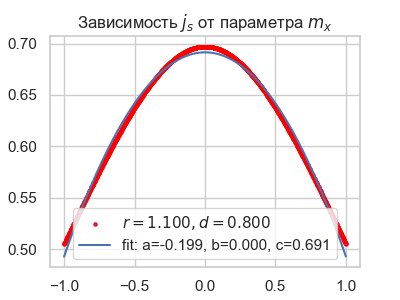

In [31]:
plt.figure(figsize=(4, 3))
plt.scatter(arr_mx, arr_js, edgecolor="red", s=5,
            label=r'$r=%6.3f, d=%6.3f$' % (r, d))
plt.plot(arr_mx, func_P2(arr_mx, *popt), 'b-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel("$m_x$")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$ от параметра $m_x$")
plt.legend()

plt.show()

__Аппроксимация многочленом  степени $n> 2$__

Для решения задачи аппроксимации возможно применить различные подходы, например, реализованный в библиотеке Numpy [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy.polyfit) или подход в библиотеке [Scipy: scipy.odr.polynomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.polynomial.html#scipy.odr.polynomial), который и применим далее:

```python
from scipy import odr
poly_model = odr.polynomial(order) 
```

Factory function for a general polynomial model.

Подробнее о методе _ODR_ (Orthogonal distance regression) Можно прочитать в [документации.](https://docs.scipy.org/doc/scipy/reference/odr.html)

In [32]:
from scipy import odr

In [33]:
# Using the 8th order polynomial model
poly_model = odr.polynomial(8)
data = odr.Data(arr_mx, arr_js)
odr_obj = odr.ODR(data, poly_model)

# Running ODR fitting
output = odr_obj.run()

poly = np.poly1d(output.beta[::-1])
poly_y = poly(arr_mx)

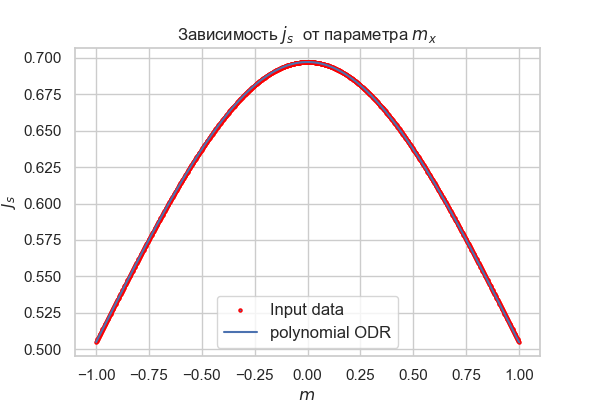

In [34]:
plt.figure(figsize=(6, 4))
plt.scatter(arr_mx, arr_js, edgecolor="red", s=5,  label="Input data")
plt.plot(arr_mx, poly_y, label="polynomial ODR")
plt.xlabel("$m$ ")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$  от параметра $m_x$")
plt.legend(fontsize=12)

plt.show()

In [35]:
Npoint = 1000  # количество точек (число вызовов функции интегрирования)
arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
arr_Ix = np.zeros(Npoint, dtype=np.float64)
arr_err = np.zeros(Npoint, dtype=np.float64)
for ind in range(Npoint):
    mx = arr_mx[ind]
    # интегрируем для каждого
    arr_Ix[ind], arr_err[ind] = quad(funct_Ix, -np.pi/2, np.pi/2,
                                         args=(mx, r, d))

# Using the 9th order polynomial model
poly_model = odr.polynomial(9)
data = odr.Data(arr_mx, arr_Ix)
odr_obj = odr.ODR(data, poly_model)

# Running ODR fitting
output = odr_obj.run()

poly = np.poly1d(output.beta[::-1])
poly_y = poly(arr_mx)

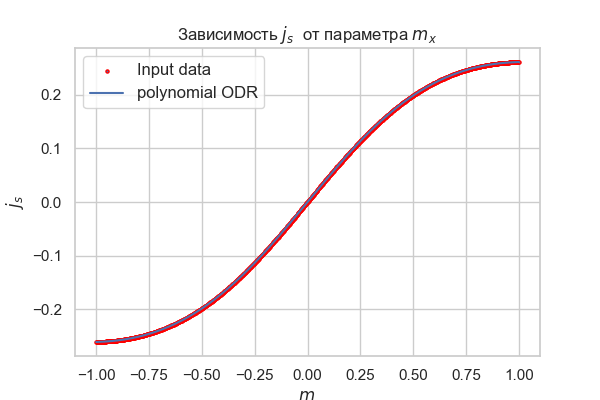

In [36]:
plt.figure(figsize=(6, 4))
plt.scatter(arr_mx, arr_Ix, edgecolor="red", s=5,  label="Input data")
plt.plot(arr_mx, poly_y, label="polynomial ODR")
plt.xlabel("$m$ ")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$  от параметра $m_x$")
plt.legend(fontsize=12)

plt.show()

## 2. Численное решение задачи Коши: библиотека SciPy

__Задача Коши:__ 
Рассмотрим решение начальной задачи (_Intial value problem_) для системы обыкновенных дифференциальных уравнений первого порядка, разрешенных относительно производной:

$
\begin{eqnarray}
\begin{cases}
    \displaystyle \frac{dy(t)}{dt} = f(t,y(t)),\\
    \displaystyle y|_{t=t_0} = y_0,
\end{cases}
\tag{1}
\end{eqnarray}
$

где $y=(y_1,...,y_n)^T$ - вектор-функция.

#### Пример 1: Численно решить задачу Коши:

$
\begin{eqnarray}
\begin{cases}
    \displaystyle \frac{dy}{dt} = y\cos(t),\\
    \displaystyle y(0)=y_0.
\end{cases}
\tag{2}
\end{eqnarray}
$

__Для сравнения приведем аналитическое решение задачи (2):__

$$
y_{exact} = y_0 e^{\sin(t)}.
$$

Воспользуемся библиотекой SciPy, содержащей [функцию для решения начальной задачи](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html):

```python
scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)[source]
```

Solve an initial value problem for a system of ODEs.
    

Для этого необходимо задать правые части уравнений (2).

In [37]:
from scipy.integrate import solve_ivp
from functools import partial

In [38]:
def F_right2(t, y, omega):
    '''right-hand part'''
    return y*np.cos(omega*t)

In [39]:
# Параметр модели
omega = 5.  # np.pi/2
# Параметры численного счета
t0 = 0
tf = 10
nt = 1000
# Массив точек (сетка) в которых будет находится решение
t_e = np.linspace(t0, tf, nt)
# Начальное условие
y0 = np.array([3])

In [40]:
f = partial(F_right2, omega=omega)
t_e = np.linspace(t0, tf, nt)
sol_2 = solve_ivp(f, [t0, tf], y0, t_eval=t_e, method='RK45',
                  rtol=1e-8, atol=1e-8)

In [41]:
sol_2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-02 ...  9.990e+00  1.000e+01]
        y: [[ 3.000e+00  3.030e+00 ...  2.819e+00  2.847e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1124
     njev: 0
      nlu: 0

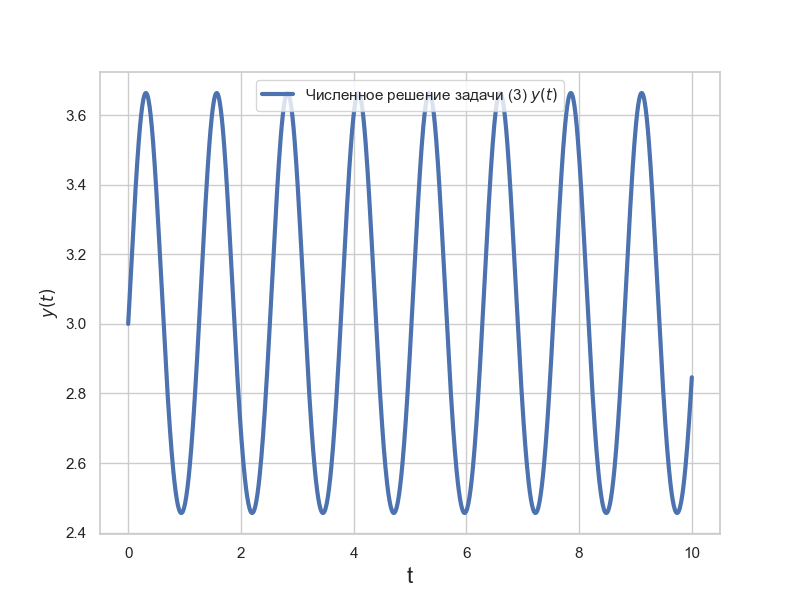

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(sol_2.t, sol_2.y[0], label='Численное решение задачи (3) $y(t)$',
         linewidth=3.0)
plt.xlabel('t', size=16)
plt.ylabel('$y(t)$', size=12)
plt.legend(loc='upper center', fontsize=11)
plt.show()

## Математическое моделирование джозефсоновского перехода сверхпроводник/ферромагнетик/сверхпроводник на поверхности трехмерного топологического изолятора

Аномальный эффект Джозефсона, который заключается в возникновении фазового сдвига в токфазовом соотношении гибридных джозефсоновских структур, состоящих из сверхпроводников и магнетиков приводит к возникновении конечного сверхпроводящего тока при нулевой джозефсоновской разности фаз. Данный фазовый сдвиг пропорционален намагниченности  ферромагнетика и отражает совместное проявление сверхпроводимости и магнетизма.

Одной из возможных подобных гибридных структур является джозефсоновский переход сверхпроводник/ферромагнетик/сверхпроводник на поверхности трехмерного топологического изолятора, содержащего дираковские квазичастицы, в котором сильная зависимость энергии Джозефсона от ориентации намагниченности открывает новые возможности для контроля намагниченности джозефсоновским током или джозефсоновской фазой. Помимо наличия сдвига фазы, также в этой структуре джозефсоновский критический ток сильно зависит от ориентации намагниченности, а именно от составляющей намагниченности в плоскости вдоль направлении тока. Такая зависимость критического тока может привести к четырехкратному вырожденному состоянию ферромагнетика, которая резко контрастирует с обычным двукратным вырожденным состояниям. Активный интерес к исследованию таких структур вызван возможностью их практического приложения. Возникающая связь между магнитным и сверхпроводниковыми степенями свободы дает возможность взаимного контроля, т.е. управления магнитными свойствами посредством сверхпроводящего тока или наоборот.


## Теоретическая модель

Ток-фазовое соотношение этого перехода задается выражением

$$
\begin{eqnarray}
j_{s}=j_{c}\sin(\varphi-\varphi_{0}),
\tag{1}
\end{eqnarray}
$$

где $j_c$ - критический ток, $\varphi$ - джозефсоновская разность фаз, $\varphi_{0}=r m_{y}$ - аномальный сдвиг фазы, $m_{y}=M_{y}/M_{s}$ - $y$ компонента намагниченности ($M_{y}$) нормированная на намагниченность насыщения $M_s$, $r = 2 d h_{\text{exc}} / \upsilon_F$ - безразмерный параметр, определяющий величину спин-орбитального взаимодействия, $d$ - толщина ферромагнитного барьера, $h_{\text{exc}}$ - обменное поле, $\upsilon_F$ -скорость Ферми.

Отличительной чертой рассматриваемого джозефсоновского перехода является то, что критический ток сильно зависит от ориентации намагниченности, а именно, от $x$ компоненты намагниченности в плоскости вдоль направления тока и задается выражением

$$
\begin{eqnarray}
    j_c = j_b \int \limits_{-\pi/2}^{\pi/2}\cos\varphi\exp\left(-\frac{\tilde{d}}{\cos\phi}\right)\cos(r m_x\tan\varphi)d\varphi,
\tag{2}
\end{eqnarray}
$$

где $\varphi$ - угол между направлением квазичастичного тока и осью $x$, $m_{x}=M_{x}/M_{s}$ - $x$ компонента намагниченности нормированная на $M_s$, $j_b = \frac{e\upsilon_F N_F\triangle^{2}}{\pi^{2}T}$, $\triangle$ - сверхпроводящий параметр порядка, $T$ - температура, $N_F$ - концентрация частиц вблизи уровня Ферми, $\upsilon_F$ - скорость Ферми, $\tilde{d}$ - безразмерная длина контакта.

Динамика вектора намагниченности $\mathbf{M}$ ферромагнитного слоя описывается в рамках уравнения Ландау - Лифшица - Гильберта (ЛЛГ):

$$
\begin{eqnarray}
\frac{d \mathbf{M}}{d t} = -\gamma \mathbf{M} \times \mathbf{H}_{\text{eff}} + \frac{\alpha}{M_s} \mathbf{M}\times \frac{d \mathbf{M}}{d t},
\tag{3}
\end{eqnarray}
$$

где $\gamma$ - гиромагнитное отношение, $\alpha$ - гильбертовское затухание и $\mathbf{H}_{\text{eff}}$ - эффективное поле. Эффективное поле определяется варьированием полной энергии системы по вектору намагниченности

$$
\begin{eqnarray}
\mathbf{H}_{\text{eff}}=-\frac{1}{V_{F}}\frac{\delta E_{t}}{\delta \mathbf{M}},
\tag{4}
\end{eqnarray}
$$

где $V_F$ - объем ферромагнитного слоя. Полная энергия системы состоит из энергии магнитной анизотропии

$$
\begin{eqnarray}
E_{M}=-KV_{F}\bigg(\frac{M_{y}}{M_{s}}\bigg)^{2},
\tag{5}
\end{eqnarray}
$$

где $K$ - константа анизотропии, и джозефсоновской энергии

$$
\begin{eqnarray}
E_{J}=\frac{\Phi_{0} j_{c}S}{2\pi}[1-\cos(\varphi-rm_{y})],
\tag{6}
\end{eqnarray}
$$

где $\Phi_{0}$ - квант магнитного потока, $S$ - площадь перехода.


Таким образом, компоненты эффективного поля в нормированных единицах могут быть записаны в виде:

$$
\begin{eqnarray}
h_{x}=\frac{H_{\text{eff,x}}}{H_F} &=& \frac{GrI_{x}}{j_{c0}} \left[1 - \cos\left(\varphi - rm_y\right)\right]\nonumber,\\ 
h_{y}=\frac{H_{\text{eff,y}}}{H_F} &=& \frac{GrI_{y}}{j_{c0}} \sin(\varphi - rm_y) + m_y\nonumber,\\    
h_{z}=\frac{H_{\text{eff,z}}}{H_F} &=& 0\nonumber,\\
\tag{7}
\end{eqnarray}
$$

где $G = \Phi_0 j_b S/ 2 \pi K V_F$ - отношение амплитуды джозефсоновской энергии к магнитной, $H_F = \omega_F/\gamma = K/M_s$, $\omega_F$ - собственная частота ферромагнитного резонанса, а $I_{x}$ и $I_{y}$ интегральные выражения определяемые как:

$$
\begin{eqnarray}
I_{x} &=& \int\limits_{-\pi/2}^{\pi/2}\sin\phi\exp\bigg(-\frac{\tilde{d}}{\cos\varphi}\bigg)\sin(r m_{x}\tan\phi)d\varphi\nonumber,\\
I_{y} &=& \int\limits_{-\pi/2}^{\pi/2}\cos\phi\exp\bigg(-\frac{\tilde{d}}{\cos\varphi}\bigg)\cos(r m_{x}\tan\phi)d\varphi\nonumber.\\
\tag{8}
\end{eqnarray}
$$

Здесь $j_{c0}$ определяет выражение для критического тока при $m_x = 0$ и записывается как

$$
\begin{equation}
j_{c0}=\int\limits_{-\pi/2}^{\pi/2}\cos\phi\exp(-\frac{\tilde{d}}{\cos\phi})d\phi
\tag{9}
\end{equation}
$$

Таким образом, в нормированных величинах, получим систему уравнений:

$$
\begin{eqnarray}
\frac{dm_{x}}{dt} &=& -\frac{\omega_{F}}{1+\alpha^2}\bigg((m_{y} h_{z}-m_{z} h_{y})
 + \alpha [m_{x} (m_{x} h_{x}+m_{y} h_{y}+m_{z} h_{z})-h_{x} m^{2}]\bigg),\nonumber\\
\frac{dm_{y}}{dt} &=& -\frac{\omega_{F}}{1+\alpha^2}\bigg((m_{z} h_{x}-m_{x} h_{z})
 +\alpha [m_{y} (m_{x} h_{x}+m_{y} h_{y}+m_{z} h_{z})-h_{y} m^{2}]\bigg),\nonumber\\
\frac{dm_{z}}{dt} &=& -\frac{\omega_{F}}{1+\alpha^2}\bigg((m_{x} h_{y} - m_{y} h_{x}) +\alpha [m_{z} (m_{x} h_{x}+m_{y} h_{y}+m_{z} h_{z})-h_{z} m^{2}]\bigg).\nonumber\\
\tag{10}
\end{eqnarray}
$$


При заданном значении напряжении можно считать разоность фаз $\varphi$ линейной функцией от времени, т.е. $\varphi=Vt$. Тогда выражения для компонент эффективного поля записываются в виде

$$
\begin{eqnarray}
h_{x} &=& \frac{GrI_{x}}{j_{c0}} \left[1 - \cos\left(Vt - rm_y\right)\right], \\
h_{y} &=& \frac{GrI_{y}}{j_{c0}} \sin(Vt - rm_y) + m_y, \\
h_{z} &=& 0.\\
\tag{11}
\end{eqnarray}
$$

### Постановка задачи

Легкая ось намагниченности в ферромагнитном слое направлена вдоль оси $y$, т.е. направления $m_y=\pm1$ являются стабильными. В работе\cite{nashaat19prb} было показано, что в SFS джозефсоновском переходе на поверхности топологического изолятора при определенных значениях параметров модели реализуются четырехкратно вырожденные стабильные состояния намагниченности.

Наша задача заключается, в том чтобы на основе математического моделирования продемонстрировать реализацию этих вырожденных состояний.

### Аппроксимация интегралов

Отметим, что при численном решении системы дифференциальных уравнений приходится на каждом шаге по времени вычислить интегралы. Это сильно замедляет процесс решения уравнений. Эту проблему можно решить следующим образом:

1. Вычислить интегралы численно в интервале $m_x \in [-1,1]$ с определенным шагом
2. Интерполировать полученный результат полиномом определенной степени
3. Затем вставить полученную приближенную формулу в уравнении и решать систему уравнений

In [43]:
%matplotlib inline

__Задаем значения параметров модели для вычисления интегралов__

In [44]:
d = 0.3
r = 0.5

__Определяем подынтегральные функции__


In [45]:
def funct_Ix(phi, mx, r, d):
    '''Defines the integrand in the definition of current Ix,
        mx, r, d - parameters'''
    return (np.sin(phi) * np.exp(-d / np.cos(phi)) * np.sin(r*mx*np.tan(phi)))


In [46]:
def funct_Iy(phi, mx, r, d):
    '''Defines the integrand in the definition of current Iy,
        mx, r, d - parameters'''
    return (np.cos(phi) * np.exp(-d / np.cos(phi)) * np.cos(r*mx*np.tan(phi)))

__Создаем массивы для $m_x$ и соответствующих значений интегралов__

In [47]:
# массивы
Npoint = 1000
arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
arr_Ix = np.zeros(Npoint, dtype=np.float64)
arr_Iy = np.zeros(Npoint, dtype=np.float64)
arr_errx = np.zeros(Npoint, dtype=np.float64)
arr_erry = np.zeros(Npoint, dtype=np.float64)
# вычисление интегралов
for ind in range(Npoint):
    mx = arr_mx[ind]
    arr_Ix[ind], arr_errx[ind] = quad(funct_Ix, -np.pi/2, np.pi/2,
                                      args=(mx, r, d))
    arr_Iy[ind], arr_erry[ind] = quad(funct_Iy, -np.pi/2, np.pi/2,
                                      args=(mx, r, d))

__Аппроксимация интегралов $I_{x}$ и $I_{y}$ многочленом девятой $P_{9}$ и восьмой $P_{8}$ степени соответственно__

In [48]:
# Using 9th order polynomial model
poly_model = odr.polynomial(9)
data = odr.Data(arr_mx, arr_Ix)
odr_obj = odr.ODR(data, poly_model)

# Running ODR fitting
output = odr_obj.run()

Ixfit = np.poly1d(output.beta[::-1])

In [49]:
# using 8th order polynomial model
poly_model = odr.polynomial(8)
data = odr.Data(arr_mx, arr_Iy)
odr_obj = odr.ODR(data, poly_model)

# Running ODR fitting
output = odr_obj.run()

Iyfit = np.poly1d(output.beta[::-1])

__Определение функции для $j_{c0}$__

In [50]:
def jc0(d):
    '''Определяет функцию для критического тока при отсутсвии F слоя
    d - параметр модели'''
    result = quad(lambda phi: np.cos(phi)*np.exp(-d/np.cos(phi)),
                  -np.pi/2, np.pi/2)
    return result

__Вычиcление $j_{c0}$__


In [51]:
Jc0 = jc0(d)
J0 = Jc0[0]
J0

1.312295858714208

In [52]:
Jc0

(1.312295858714208, 9.235495215506846e-10)

__Определяем правые части системы уравнений__

In [53]:
def my_sfs(t, S, G, r, alpha, wF, d, V, J0):
    '''Определяет правые части ДУ
    G, r, alpha, wF - параметры модели
    S=[mx, my, mz, ph] - искомая вектор-функция'''
    mx = S[0]
    my = S[1]
    mz = S[2]

    Jx = Ixfit(mx)
    Jy = Iyfit(mx)

    Hx = (G*r*Jx/J0)*(1-np.cos(V*t-r*my))
    Hy = (G*r*Jy/J0)*np.sin(V*t-r*my)+my
    Hz = 0

    H = [Hx, Hy, Hz]
    M = [mx, my, mz]

    m2 = np.dot(M, M)
    HdM = np.dot(H, M)

    ksi = -wF/(1+alpha*alpha*m2)

    dmx = ksi * ((my*Hz-mz*Hy) + alpha * (mx*HdM-Hx*m2))
    dmy = ksi * ((mz*Hx-mx*Hz) + alpha * (my*HdM-Hy*m2))
    dmz = ksi * ((mx*Hy-my*Hx) + alpha * (mz*HdM-Hz*m2))

    dS = [dmx, dmy, dmz]
    return dS

In [54]:
G = 4.5 # отношение энергии Джозефсона к энергии магнитной анизотропии
r = 0.5 # параметр спин−орбитального взаимодействия
d = 0.3 # безразмерная длина джозефсоновского перехода
wF = 1  # собственная частота ферромагнитного резонанса
alpha = 0.01 # параметр гильбертовского затухания
V = 5  # напряжение в джозефсоновском переходе

t0 = 0
tf = 1500
nt = 15000

In [55]:
s = np.array([0, 1, 0])
dS = my_sfs(0, s, 4.12, 0.5, 0.01, 1, 0.3, 5, J0)
dS

[7.222516384958603e-11, -0.0, 7.2225163849586024e-09]

__Задаем начальные условия $m_{x}=-0.5$, $m_{z}=0$, $m_{y}=\sqrt{1-m_{x}^{2}-m_{z}^{2}}$__


In [56]:
mx0 = -0.5
mz0 = 0
my0 = np.sqrt(1-mx0*mx0-mz0*mz0)

In [72]:
f = partial(my_sfs, G=G, r=r, alpha=alpha, wF=wF, d=d, V=V, J0=J0)
t_e = np.linspace(t0, tf, nt)
s0 = np.array([mx0, my0, mz0])
sol_1 = solve_ivp(f, [t0, tf], s0, t_eval=t_e, method='BDF',
                  rtol=1e-8, atol=1e-8)

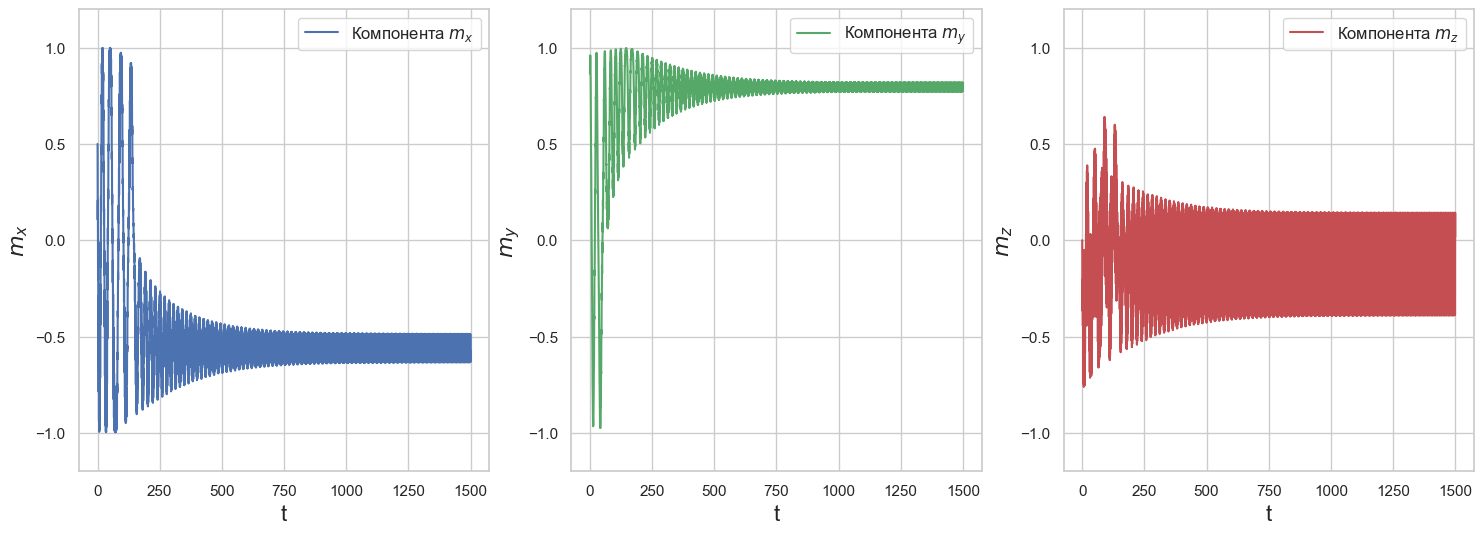

In [73]:
%matplotlib inline
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.ylim(-1.2, 1.2)
plt.plot(sol_1.t, sol_1.y[0], label='Компонента $m_x $', color='b')
plt.xlabel('t', size=16)
plt.ylabel('$m_{x}$', size=16)
plt.legend(fontsize=12)
plt.subplot(1, 3, 2)
plt.ylim(-1.2, 1.2)
plt.plot(sol_1.t, sol_1.y[1], label='Компонента $m_y $', color='g')
plt.xlabel('t', size=16)
plt.ylabel('$m_{y}$', size=16)
plt.legend(fontsize=12)
plt.subplot(1, 3, 3)
plt.ylim(-1.2, 1.2)
plt.plot(sol_1.t, sol_1.y[2], label='Компонента $m_z $', color='r')
plt.xlabel('t', size=16)
plt.ylabel('$m_{z}$', size=16)
plt.legend(fontsize=12)
plt.show()

__Влияние начальных условий__


In [74]:
mx0 = 0.5
mz0 = 0
my0 = np.sqrt(1-mx0*mx0-mz0*mz0)

In [281]:
f = partial(my_sfs, G=1.25, r=r, alpha=alpha, wF=wF, d=d, V=V, J0=J0)
t_e = np.linspace(t0, tf, nt)
s0 = np.array([mx0, my0, mz0])
sol_2 = solve_ivp(f, [t0, tf], s0, t_eval=t_e, method='BDF', rtol=1e-8, atol=1e-8)

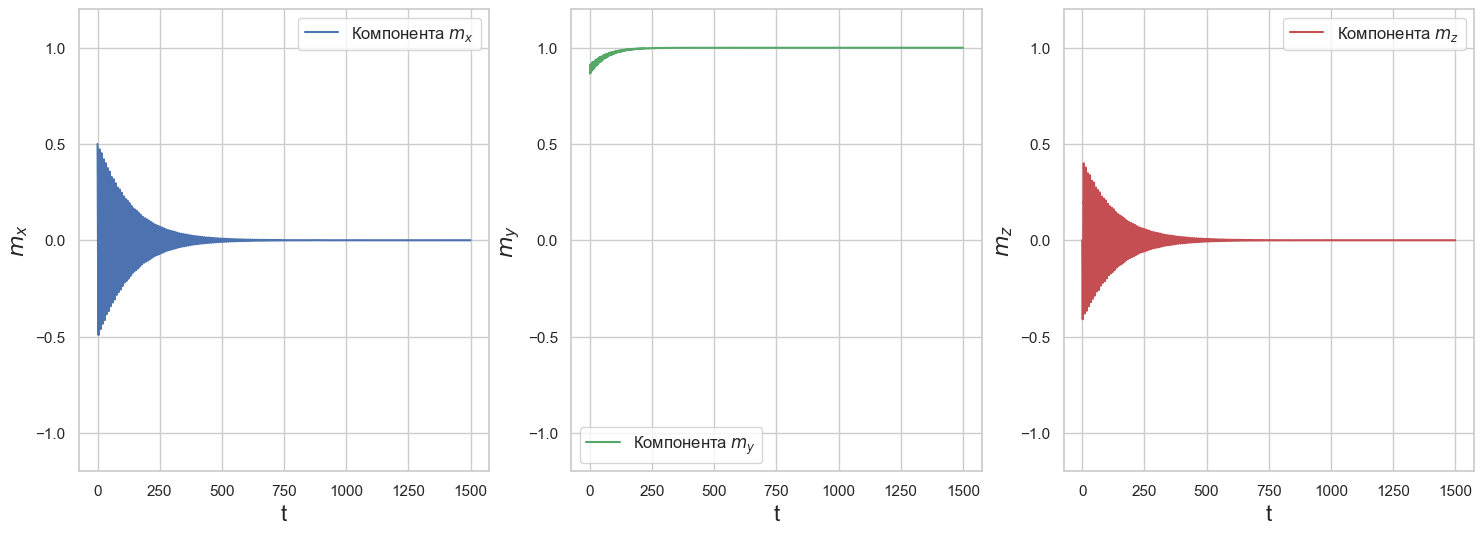

In [282]:
%matplotlib inline
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.ylim(-1.2, 1.2)
plt.plot(sol_2.t, sol_2.y[0], label='Компонента $m_x $', color='b')
plt.xlabel('t', size=16)
plt.ylabel('$m_{x}$', size=16)
plt.legend(fontsize=12)
plt.subplot(1, 3, 2)
plt.ylim(-1.2, 1.2)
plt.plot(sol_2.t, sol_2.y[1], label='Компонента $m_y $', color='g')
plt.xlabel('t', size=16)
plt.ylabel('$m_{y}$', size=16)
plt.legend(fontsize=12)
plt.subplot(1, 3, 3)
plt.ylim(-1.2, 1.2)
plt.plot(sol_2.t, sol_2.y[2], label='Компонента $m_z $', color='r')
plt.xlabel('t', size=16)
plt.ylabel('$m_{z}$', size=16)
plt.legend(fontsize=12)
plt.show()

# Пример распараллеливания

In [283]:
import joblib

In [284]:
f"Number of cpu: {joblib.cpu_count()}"

'Number of cpu: 8'

In [285]:
sol_1.y[0][-1]

-0.5738074502086493

In [286]:
sol_2.y[0][-1]

-2.6992362231474343e-06

### Mean [750, 1500] mx my

In [287]:
mx_750_1500 = sol_2.y[0][7500:]
my_750_1500 = sol_2.y[1][7500:]
mz_750_1500 = sol_2.y[2][7500:]

In [288]:
mx_mean = np.mean(mx_750_1500)
mx_mean

-1.1831645871327533e-06

In [289]:
my_mean = np.mean(my_750_1500)
my_mean

1.000000608633775

In [290]:
mz_mean = np.mean(mz_750_1500)
mz_mean

1.0534689901157607e-06

In [291]:
my_mean*my_mean + mx_mean*mx_mean + mz_mean*mz_mean

1.0000012172704298

In [279]:
mx_750_1500.shape

(7500,)

In [280]:
sol_2.y.shape

(3, 15000)

In [96]:
def get_G_bests(truncated_solutions):

    squared_sums_deviation = []
    best_g_indexes = []
    
    for s in truncated_solutions:
        mx_mean = np.mean(s.y[0])
        my_mean = np.mean(s.y[1])
        mz_mean = np.mean(s.y[2])

        square_sum = my_mean*my_mean + mx_mean*mx_mean + mz_mean*mz_mean
        absolute_val = abs(1 - square_sum)
        
        squared_sums_deviation.append(absolute_val)

    for _ in range(4):
        best_g_index = np.argmin(squared_sums_deviation)
        best_g_indexes.append(best_g_index)
        squared_sums_deviation = np.delete(squared_sums_deviation, best_g_index)

    return best_g_indexes

In [325]:
def truncate_solutions(solutions):

    truncated_solutions = []

    for s in solutions:
        truncation_index = 0

        amplitudes = []
        for i in range(1, len(s.y[0]), 2): 
            amplitudes.append(abs(s.y[0][i-1] - s.y[0][i]))

        print(amplitudes[:10])
        mean_amplitude = np.median(amplitudes)
        print(mean_amplitude, "max:", np.max(amplitudes))

        for i in range(1, len(s.y[0]), 2):
            if abs(s.y[0][i-1] - s.y[0][i]) < mean_amplitude:
                truncated_solutions.append(np.array([s.y[0][i:], s.y[1][i:],s.y[2][i:]])) # add new truncated solutions for each
                print(i)
                break

    if len(truncated_solutions) == 0:
        print("No stabilization!")

    return truncated_solutions

In [326]:
ts = truncate_solutions(np.array([sol_1, sol_2]))
for i in range(len(ts)):
    print(ts[i].shape)

[0.000698740403399345, 0.03698506052453965, 0.09762966774257542, 0.060959069895438034, 0.012751624176249213, 0.03279125123083995, 0.002676170407602624, 0.04769972584034052, 0.0883793003835382, 0.06129564343134597]
0.02197417795938228 max: 0.12823564169670537
1
[0.0017346705592588552, 0.015987141166329433, 0.03396098967622174, 0.03236093086673014, 0.016376352435712838, 0.00920415939531416, 0.020450336676087977, 0.04474471851668041, 0.06171455182622179, 0.0522435337786753]
4.070617243467384e-05 max: 0.06171455182622179
813
(3, 14999)
(3, 14187)
